## Desciption

This model predicts the expression of a gene based on the Urtecho 2023 data.

In [2]:
import CNN_Urtecho_1_0 as parent

In [3]:
name = 'CNN_Urtecho_1_0'

In [4]:
import pandas as pd

file_path = '../Data/Urtecho_2023/Urtecho_2023.csv'
df = pd.read_csv(file_path)

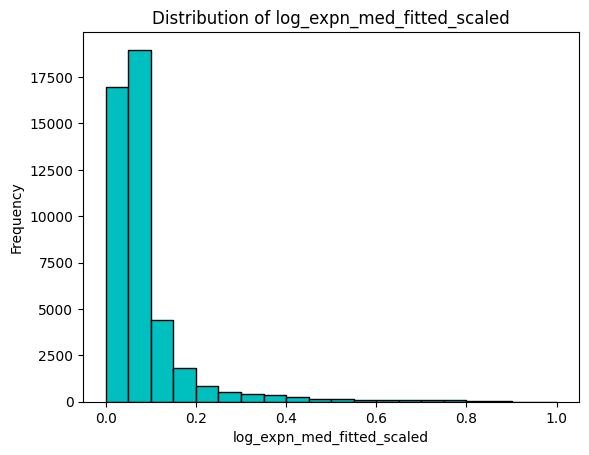

In [5]:
# graph the distribution of observed transciption rates

import matplotlib.pyplot as plt

plt.hist(df['log_expn_med_fitted_scaled'], bins=20, color='c', edgecolor='black')
plt.title('Distribution of log_expn_med_fitted_scaled')
plt.xlabel('log_expn_med_fitted_scaled')
plt.ylabel('Frequency')
plt.show()

In [8]:
X, y = parent.combine_columns(df)
X, max_length = parent.preprocess_sequences(X)

In [9]:
X.shape

(45201, 150, 4)

In [10]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0161 - val_loss: 0.0082
Epoch 2/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 3/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 4/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0071 - val_loss: 0.0066
Epoch 5/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 6/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0044 - val_loss: 0.0051
Epoch 7/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0036 - val_loss: 0.0048
Epoch 8/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0029 - val_loss: 0.0050
Epoch 9/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0024 - val_loss: 0.0050
Epoch 10/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 11/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 12/150
1130/

1413/1413 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


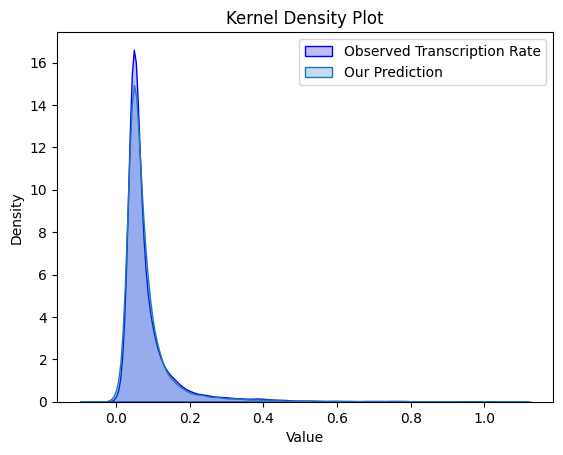

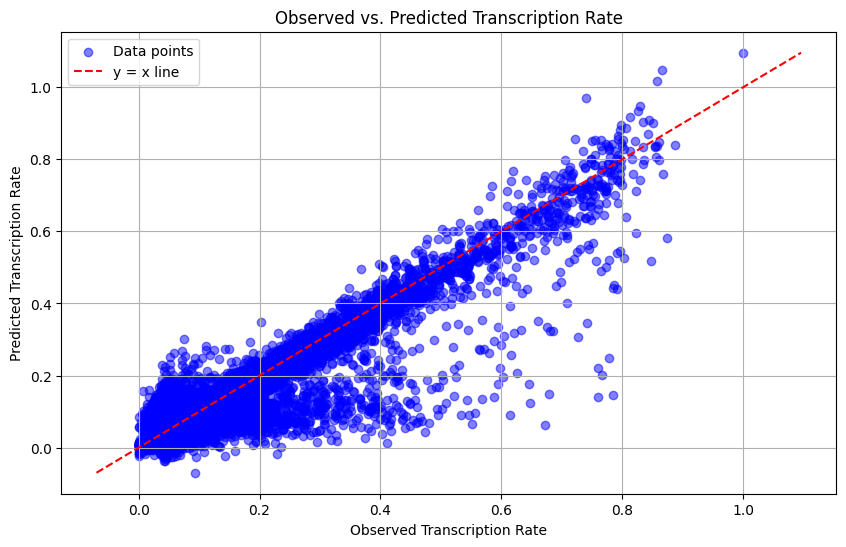

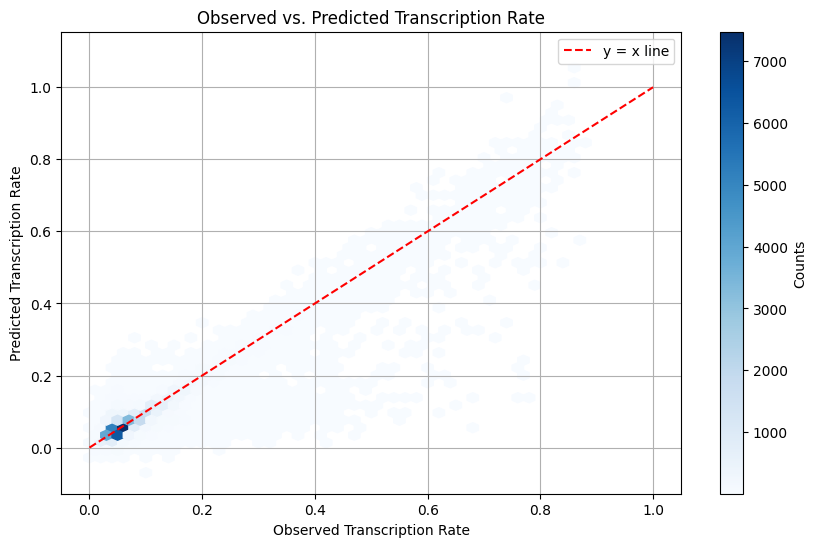

In [11]:
predicted = parent.load_and_predict(name, X)
observed = df['log_expn_med_fitted_scaled'].values

parent.plot_kde(df, predicted)
parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


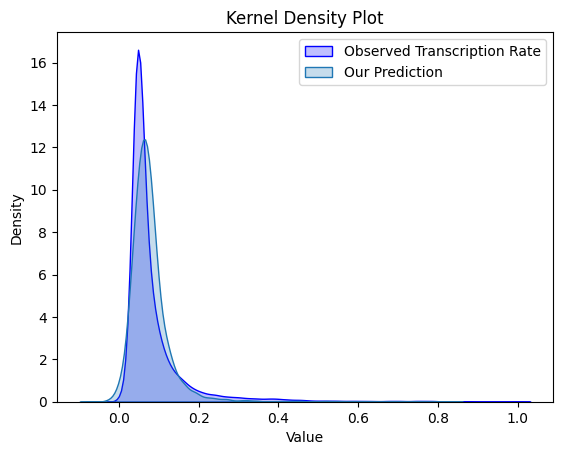

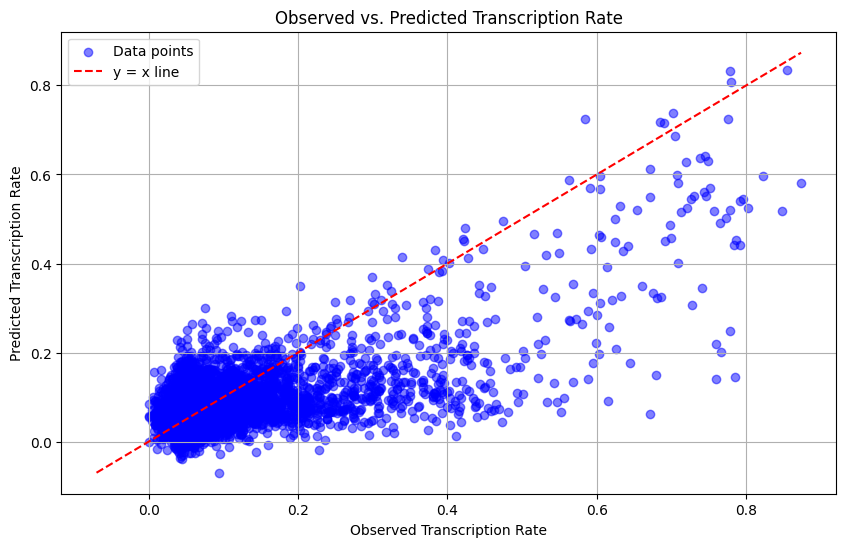

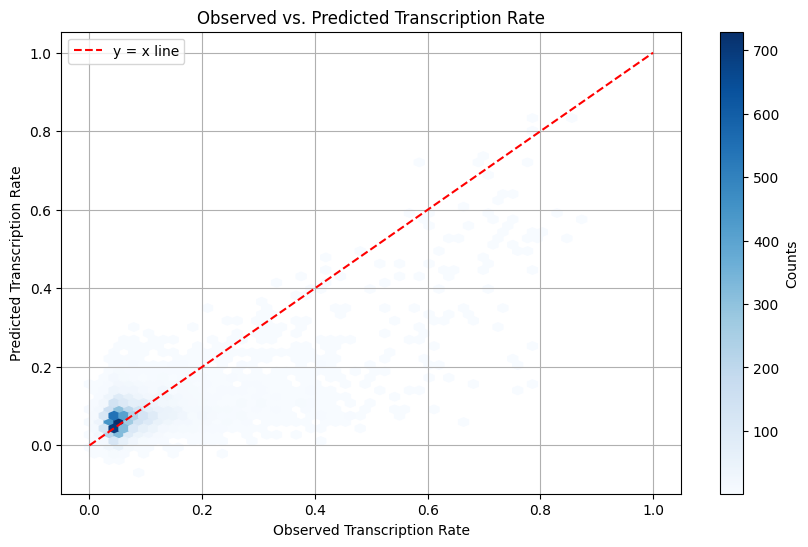

In [10]:
predicted = parent.load_and_predict(name, X_test)
observed = y_test

parent.plot_kde(df, predicted)
parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

In [11]:
# Load, predict, and evaluate the best model
y_pred = parent.load_and_predict(name, X_test)
mse, rmse, mae, r2 = parent.calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE:  0.00471885573840087
RMSE:  0.06869392795874225
MAE:  0.041130027274947606
R2:  0.449707547713445
